In [2]:
import pandas as pd

In [13]:
lidrekon_df = pd.read_csv('lidrekon_ORIGINAL.csv', encoding='cp1251', delimiter=";")
lidrekon_df = lidrekon_df.rename(columns={rus:en for rus,en in zip(lidrekon_df.columns, ['No.', 'Date', 'Description'])})
lidrekon_df = lidrekon_df.drop('No.', axis=1, inplace=False)
print(lidrekon_df)

                     Date                                        Description
0     2024-04-27 02:33:20  пїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅ пїЅпїЅпїЅпїЅ...
1     2024-03-11 12:46:18  пїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅ пїЅ...
2     2024-03-11 12:45:09  пїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅ "пїЅпїЅпїЅпїЅпїЅпїЅпї...
3     2024-01-15 04:04:18  пїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅ пїЅпїЅпїЅпїЅ...
4     2023-12-28 01:19:07  пїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅ пїЅпїЅпїЅпїЅпїЅпїЅ...
...                   ...                                                ...
5341  2013-01-19 07:23:28  пїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅ "пїЅпїЅпїЅпїЅпїЅпї...
5342  2013-01-19 07:23:28  пїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅ пїЅпїЅпїЅпїЅпїЅпїЅпїЅ...
5343  2013-01-19 07:23:28  пїЅпїЅпїЅпїЅпїЅпїЅ пїЅпїЅпїЅпїЅ пїЅпїЅпїЅпїЅпї...
5344  2013-01-19 07:23:28  пїЅпїЅпїЅпїЅпїЅ "пїЅпїЅпїЅпїЅпїЅ пїЅпїЅпїЅпїЅп...
5345  2013-01-19 07:22:43  пїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅ пїЅпїЅпїЅпїЅ...

[5346 rows x 2 columns]


In [14]:
lidrekon_df.loc[lidrekon_df['Description'].isnull(), :]
print(len(lidrekon_df))
lidrekon_df = lidrekon_df.loc[~lidrekon_df['Description'].isnull(), :]
print(len(lidrekon_df))

5346
5343


In [15]:
def find_titles(x):
    if len(x)==0:
        return [None]
    elif len(x)==1:
        return x
    else:
        return [x[i] for i in range(len(x)) if i%2==1]
lidrekon_df['TitleCandidates'] = lidrekon_df['Description'].str.split('"').apply(find_titles)
lidrekon_df['Title'] = lidrekon_df['TitleCandidates'].apply(lambda x: x[0])

In [16]:
print(lidrekon_df.head().to_string())

                  Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

0                                              SKVERNA
1    пїЅ пїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅ КёпїЅпїЅ...
2    пїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅ ...
3                               i..пїЅ пїЅпїЅпїЅпїЅпїЅ
4    пїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅ пїЅпїЅпїЅпїЅпїЅпїЅпїЅ...
4
3
7
9
6
10


<Axes: ylabel='Frequency'>

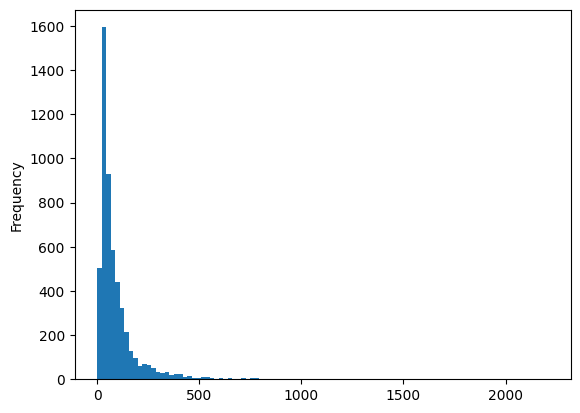

In [17]:
print(lidrekon_df.head()['Title'].to_string())

def try_len(x):
    try:
        return len(x)
    except:
        return 0

lengths = lidrekon_df['Title'].apply(try_len)
print(len(lengths.loc[lengths==0]))
print(len(lengths.loc[lengths==1]))
print(len(lengths.loc[lengths==2]))
print(len(lengths.loc[lengths==3]))
print(len(lengths.loc[lengths==4]))
print(len(lengths.loc[lengths==5]))
lengths.plot.hist(bins=100)

In [18]:
lidrekon_df.to_csv('lidrekon.csv')